In [3]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def preprocess_data(data):
    # Drop columns with NaN values
    data = data.dropna(axis=1)

    categorical_columns = ["Materialnummer", "Lieferant OB", "Vertragsposition OB", "Beschaffungsart", "Disponent", "Einkäufer", "Dispolosgröße", "Werk OB", "Warengruppe", "Basiseinheit"]
    numerical_columns = ["Planlieferzeit Vertrag", "Vertrag Fix1", "Vertrag_Fix2", "Gesamtbestand", "Gesamtwert", "Preiseinheit", "WE-Bearbeitungszeit", "Planlieferzeit Mat-Stamm"]
    
    materialnummern = data["Materialnummer"]
    # data.loc[:,categorical_columns] = data[categorical_columns].astype('category')
    data[numerical_columns] = data[numerical_columns].astype('int64')

    # Select only numeric columns
    processed_data = data[numerical_columns]

    # Normalize features
    scaler = StandardScaler()
    processed_data = pd.DataFrame(scaler.fit_transform(processed_data), columns=processed_data.columns)

    return processed_data, materialnummern

file_path = '../../datasets/Stammdaten.csv'
df = pd.read_csv(file_path, low_memory=False)
processed_df, materialnummern = preprocess_data(df)
print(materialnummern[:10])

0      00345241
1      00346718
2      60038465
3      60038640
4      60014570
5    28287702UB
6    28287702UB
7      60045005
8      60045005
9      60045005
Name: Materialnummer, dtype: object


/var/folders/l0/0614kf4s65x565bh4hp9dvym0000gn/T/ipykernel_5943/1947756252.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = data[numerical_columns].astype('int64')


In [4]:
import numpy as np
from sklearn.cluster import KMeans

def detect_anomalies(data, num_clusters, threshold):
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    
    # Calculate distances of each point to its nearest cluster center
    distances = kmeans.transform(data)
    
    # Calculate average distance to cluster centers for each point
    avg_distances = np.mean(distances, axis=1)
    
    # Calculate threshold for anomaly detection
    anomaly_threshold = np.percentile(avg_distances, threshold)
    
    print(avg_distances[:10])
    
    # Identify anomalies
    anomalies = data[avg_distances > anomaly_threshold]
    
    return anomalies, avg_distances > anomaly_threshold

anomalies, anomaly_indices = detect_anomalies(processed_df, num_clusters=2, threshold=40)
print(anomalies)
anomalies.to_csv('anomalies.csv', index=False)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3.98460898 3.98460898 3.89585261 3.89585261 3.98460898 3.98460898
 3.98460898 3.98729785 3.98729785 3.98729785]
        Planlieferzeit Vertrag  Vertrag Fix1  Vertrag_Fix2  Gesamtbestand  \
0                    -0.119965     -0.119173     -0.152971      -0.019679   
1                    -0.119965     -0.119173     -0.152971      -0.019679   
4                    -0.119965     -0.119173     -0.152971      -0.019679   
5                    -0.119965     -0.119173     -0.152971      -0.019679   
6                    -0.119965     -0.119173     -0.152971      -0.019679   
...                        ...           ...           ...            ...   
186751                8.573091     -0.119173     -0.152971      -0.016827   
186752                0.431975      1.161046      4.741521       0.342038   
186753                0.431975      1.161046      4.741521      -0.008917   
186754                0.431975      1.161046      4.741521       0.077073   
186755                0.431975      1.16

In [5]:
anomaly_indices_new = [0 if x == False else 1 for x in anomaly_indices]
print(len(anomaly_indices_new))
print(len(df))
supervised_dataset = pd.read_csv(r"/Users/raoul/Documents/Studium/AI_Project/git/ai-project/knn_raoul/datasets/supervised_dataset.csv")
supervised_dataset["knn_predictions"] = anomaly_indices_new

anomaly_count = 0
for element in supervised_dataset["anomaly"]:
    if element == 1:
        anomaly_count += 1


knn_anomaly_count = 0
for element in supervised_dataset["knn_predictions"]:
    if element == 1:
        knn_anomaly_count += 1        

        
print(anomaly_count/len(df))
print("Knn precent count: ", knn_anomaly_count/len(df))

# Calculate the percentage of matching entries
matching_percentage = (supervised_dataset['anomaly'] == supervised_dataset['knn_predictions']).mean() * 100

print(f"Percentage of matching entries: {matching_percentage:.2f}%")

print(materialnummern[:20])
supervised_dataset[:20]

186756
186756
0.6039056308766518
Knn precent count:  0.5584398894814624
Percentage of matching entries: 51.40%
0       00345241
1       00346718
2       60038465
3       60038640
4       60014570
5     28287702UB
6     28287702UB
7       60045005
8       60045005
9       60045005
10      60045005
11      60045005
12      60045005
13      60102743
14      60102743
15      60045005
16      60045005
17      60045005
18      95151035
19      24145403
Name: Materialnummer, dtype: object


/var/folders/l0/0614kf4s65x565bh4hp9dvym0000gn/T/ipykernel_5943/3934162703.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  supervised_dataset = pd.read_csv(r"/Users/raoul/Documents/Studium/AI_Project/git/ai-project/knn_raoul/datasets/supervised_dataset.csv")


,Material number,Supplier,Contract,Contract Position,Fulfillment time,Fixed contract 1,Fixed contract 2,Procurement type,Special procurement type,Dispatcher,...,Plant,Plant information record,Information record number,Information record type,Plant processing time,Material master time,Product group,Base unit,anomaly,knn_predictions
0,00345241,3000,NaN,0,0,0,0,F,40.0,215,...,2100,NaN,NaN,NaN,1,3,80100000,ST,0,1
1,00346718,2000,NaN,0,0,0,0,F,40.0,215,...,2100,NaN,NaN,NaN,1,3,80600000,ST,0,1
2,60038465,2000,NaN,0,0,0,0,F,40.0,215,...,3000,NaN,NaN,NaN,1,84,80100000,ST,1,0
3,60038640,2000,NaN,0,0,0,0,F,40.0,217,...,3000,NaN,NaN,NaN,1,84,80300000,ST,1,0
4,60014570,2000,NaN,0,0,0,0,F,40.0,215,...,2100,NaN,NaN,NaN,1,3,80100000,ST,0,1
5,28287702UB,3000,NaN,0,0,0,0,F,42.0,233,...,2100,2000.0,5.300529e+09,0.0,1,3,60100000,ST,1,1
6,28287702UB,3000,NaN,0,0,0,0,F,42.0,233,...,2100,2100.0,5.300529e+09,0.0,1,3,60100000,ST,1,1
7,60045005,3000,NaN,0,0,0,0,F,42.0,233,...,2000,2000.0,5.300530e+09,0.0,1,1,110400000,ST,1,1
8,60045005,3000,NaN,0,0,0,0,F,42.0,233,...,2000,2100.0,5.300530e+09,0.0,1,1,110400000,ST,1,1
9,60045005,3000,NaN,0,0,0,0,F,42.0,233,...,2000,2800.0,5.300530e+09,0.0,1,1,110400000,ST,1,1


# New knn approach to get better results

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


file_path = '../../datasets/supervised_dataset.csv'
df = pd.read_csv(file_path, low_memory=False)
df = df.dropna(axis=1)
df = df.drop("Material number", axis=1)

X = df.drop('anomaly', axis=1)
y = df['anomaly']
X = X.reset_index(drop=True,)
print(X)

train_percent_index = round(len(df['anomaly'])*0.7)
print(train_percent_index)
X_train = X[:train_percent_index]
y_train = y[:train_percent_index]

X_test = X[train_percent_index:]
y_test = y[train_percent_index:]

# Identify numerical and categorical columns
categorical_cols = ["Supplier", "Contract Position", "Procurement type",  "Dispatcher", "Buyer", 
                                    "Purchasing lot size", "Plant", 
                                     "Product group",
                                    "Base unit"]
numerical_cols = ["Fulfillment time", "Fixed contract 1", "Fixed contract 2", "Total quantity", "Total value", 
                                  "Price unit", "Material master time", "Plant processing time"]


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and fit the KNN model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Fit the model
model.fit(X_train, y_train)

# X_test = X_test.drop(df.columns[0], axis=1)

predictions = model.predict(X_test)
print(predictions)


C:\Users\Raoul\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


        Supplier  Contract Position  Fulfillment time  Fixed contract 1  \
0           3000                  0                 0                 0   
1           2000                  0                 0                 0   
2           2000                  0                 0                 0   
3           2000                  0                 0                 0   
4           2000                  0                 0                 0   
...          ...                ...               ...               ...   
186751    704947                 10                63                 0   
186752    700020                 10                 4                 4   
186753    701806                 10                 4                 4   
186754    701806                 10                 4                 4   
186755    701806                 10                 4                 4   

        Fixed contract 2 Procurement type  Dispatcher  Buyer  \
0                      0           

C:\Users\Raoul\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1, 3, 4, 5, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[0 1 0 ... 1 1 1]


In [6]:
import numpy as very


# Calculate the percentage of matching entries
matching_percentage = (y_test == predictions).mean() * 100
print(f"Percentage of matching entries (accuracy): {matching_percentage:.2f}%")

# Calculate precision components
matching_ones = (y_test == 1) & (predictions == 1)
amount_anomalies_in_predictions = sum(predictions == 1)
count_matching_ones = matching_ones.sum()

# Calculate precision
if amount_anomalies_in_predictions > 0:
    precision = (count_matching_ones / amount_anomalies_in_predictions) * 100
else:
    precision = 0
print(f"Percent of matching anomalies (precision): {precision:.2f}%")

# Calculate false negatives
false_negatives = sum((y_test == 1) & (predictions == 0))
print(f"Number of false negatives: {false_negatives}")

# Calculate percentage of anomalies in predictions and validation data
percent_anomalies_in_predictions = (amount_anomalies_in_predictions / len(predictions)) * 100
percent_anomalies_in_validation = (sum(y_test == 1) / len(y_test)) * 100
print(f"Percent of anomalies in predictions: {percent_anomalies_in_predictions:.2f}%")
print(f"Percent of anomalies in validation data: {percent_anomalies_in_validation:.2f}%")
print(f"Recall: {100*count_matching_ones/(count_matching_ones+false_negatives):.2f}%")

Percentage of matching entries (accuracy): 79.45%
Percent of matching anomalies (precision): 85.47%
Number of false negatives: 7697
Percent of anomalies in predictions: 46.91%
Percent of anomalies in validation data: 53.83%
Recall: 74.48%


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation
data = {
    'Model': ['K-Nearest Neighbors', 'Neural Network', 'Random Forest'],
    'Precision': [85.47, 90.14, 91.00],
    'Recall': [74.48, 79.84, 91.00]
}

df = pd.DataFrame(data)

# Display the DataFrame to verify everything is correct
df

,Model,Precision,Recall
0,K-Nearest Neighbors,85.47,74.48
1,Neural Network,90.14,79.84
2,Random Forest,91.00,91.00


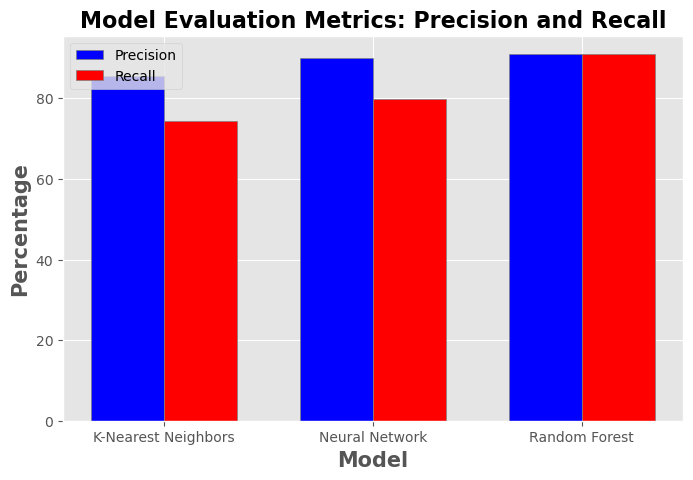

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation
data = {
    'Model': ['K-Nearest Neighbors', 'Neural Network', 'Random Forest'],
    'Precision': [85.47, 90.14, 91.00],
    'Recall': [74.48, 79.84, 91.00]
}

df = pd.DataFrame(data)

# Set the style for aesthetic purposes
plt.style.use('ggplot')

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))

# Width of a bar
width = 0.35  

# Setting position of bars on X axis
r1 = range(len(df))
r2 = [x + width for x in r1]

# Creating the bars
precision_bars = ax.bar(r1, df['Precision'], color='blue', width=width, edgecolor='grey', label='Precision')
recall_bars = ax.bar(r2, df['Recall'], color='red', width=width, edgecolor='grey', label='Recall')

# Adding labels
ax.set_xlabel('Model', fontweight='bold', fontsize=15)
ax.set_ylabel('Percentage', fontweight='bold', fontsize=15)
ax.set_title('Model Evaluation Metrics: Precision and Recall', fontweight='bold', fontsize=16)
ax.set_xticks([r + width/2 for r in range(len(df))])
ax.set_xticklabels(df['Model'])

# Create legend & Show graphic
ax.legend()
plt.show()



In [2]:
####################### PCA encoding testing ##################

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder


# Sample categorical data
data = {'category': ['dog', 'cat', 'bird', 'dog', 'cat', 'bird', 'cat', 'bird']}
df = pd.DataFrame(data)

# Apply one-hot encoding
encoder = OneHotEncoder(sparse=False)
one_hot_encoded_data = encoder.fit_transform(df[['category']])
print("One-Hot Encoded Data:")
print(one_hot_encoded_data)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(one_hot_encoded_data)
print("Reduced Data:")
print(reduced_data)

One-Hot Encoded Data:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


C:\Users\Raoul\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
file_path = r'/Users/raoul/Documents/Studium/AI_Project/git/ai-project/knn_raoul/datasets/supervised_dataset.csv'
df = pd.read_csv(file_path, low_memory=False)
df

,Material number,Supplier,Contract,Contract Position,Fulfillment time,Fixed contract 1,Fixed contract 2,Procurement type,Special procurement type,Dispatcher,...,Calendar,Plant,Plant information record,Information record number,Information record type,Plant processing time,Material master time,Product group,Base unit,anomaly
0,00345241,3000,NaN,0,0,0,0,F,40.0,215,...,NaN,2100,NaN,NaN,NaN,1,3,80100000,ST,0
1,00346718,2000,NaN,0,0,0,0,F,40.0,215,...,E11,2100,NaN,NaN,NaN,1,3,80600000,ST,0
2,60038465,2000,NaN,0,0,0,0,F,40.0,215,...,NaN,3000,NaN,NaN,NaN,1,84,80100000,ST,1
3,60038640,2000,NaN,0,0,0,0,F,40.0,217,...,NaN,3000,NaN,NaN,NaN,1,84,80300000,ST,1
4,60014570,2000,NaN,0,0,0,0,F,40.0,215,...,E11,2100,NaN,NaN,NaN,1,3,80100000,ST,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186751,04005946,704947,4.600012e+09,10,63,0,0,F,NaN,272,...,NaN,3000,NaN,5.300123e+09,0.0,1,63,80400000,ST,1
186752,00371028,700020,5.500005e+09,10,4,4,60,F,NaN,272,...,NaN,3000,NaN,5.300134e+09,0.0,1,7,140300000,ST,1
186753,00371059,701806,5.500005e+09,10,4,4,60,F,NaN,272,...,E99,3000,NaN,5.300153e+09,0.0,1,21,140300000,ST,1
186754,00350881,701806,5.500005e+09,10,4,4,60,F,NaN,272,...,NaN,3000,NaN,5.300176e+09,0.0,1,7,140200000,ST,1
